<a href="https://colab.research.google.com/github/degel007/1st-se-assesment-filemester/blob/main/Cinema_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

df = pd.read_excel('/content/Film Summary 2018 till date - full excel report.xls', skiprows=2, header=0)

df.head()

,#,Title,Dist,Dist.1,Rating,Release Date,Weeks\nIn Range,Opening\nWeekend Gross N,Opening\nWeekend Adm,Opening\nWeek Gross N,...,Primary Territory of Origin 1,Non-Primary Territory of Origin 1,Non-Primary Territory of Origin 2,Non-Primary Territory of Origin 3,Original Languages,Original Title,Booking Title #,Title\nGlobal ID,Locs at\nOpening Weekend,Opng Wknd Avg N
0,1,Everybody Loves Jenifa,F1 NOLLYWD,FilmOne Nollywood,15,2024-12-13,12.0,1.903683e+08,38920.0,3.368251e+08,...,Nigeria,NaN,NaN,NaN,English,Everybody Loves Jenifa,252475,TTL-135188,87.0,1413.85
1,2,"Tribe Called Judah, A",F1 NOLLYWD,FilmOne Nollywood,15,2023-12-15,11.0,1.142117e+08,32575.0,2.286990e+08,...,Nigeria,NaN,NaN,NaN,English,"Tribe Called Judah, A",249871,TTL-133869,74.0,1949.15
2,3,Black Panther: Wakanda Forever,F1 DISNEY,FilmOne Disney,12A,2022-11-11,17.0,2.230422e+08,79121.0,3.192332e+08,...,USA,NaN,NaN,NaN,English,Black Panther: Wakanda Forever,143521,TTL-87517,64.0,7910.35
3,4,Spider-Man: No Way Home,F1 SONY,FilmOne Sony,PG13,2021-12-17,16.0,1.205173e+08,53618.0,2.461839e+08,...,USA,NaN,NaN,NaN,English,Spider-Man: No Way Home,157976,TTL-100677,62.0,4731.81
4,5,Deadpool & Wolverine,F1 DISNEY,FilmOne Disney,15,2024-07-26,18.0,1.446051e+08,26667.0,2.049600e+08,...,USA,NaN,NaN,NaN,English,Deadpool & Wolverine,211251,TTL-113343,69.0,1303.27


In [ ]:
df.columns

Index(['#', 'Title', 'Dist', 'Dist.1', 'Rating', 'Release Date',
       'Weeks\nIn Range', 'Opening\nWeekend Gross N', 'Opening\nWeekend Adm',
       'Opening\nWeek Gross N', 'Widest\nLocs', 'Widest Exhibition Week',
       'Opening\nWeek Adm', 'Most Recent\nWeekend Gross N',
       'Most Recent\nWeekend Adm', 'Most Recent\nWeek Gross N',
       'Most Recent\nWeek Adm', 'Date Range N', 'Date Range\nAdmissions',
       'Flash Cume N', 'Flash Cume', 'Primary Genre', 'Non-Primary Genre',
       'Primary Territory of Origin 1', 'Non-Primary Territory of Origin 1',
       'Non-Primary Territory of Origin 2',
       'Non-Primary Territory of Origin 3', 'Original Languages',
       'Original Title', 'Booking Title #', 'Title\nGlobal ID',
       'Locs at\nOpening Weekend', 'Opng Wknd Avg N'],
      dtype='object')

In [ ]:
df['Average_screens'] = (df['Opening\nWeek Adm']/df['Locs at\nOpening Weekend'])/80

df['Average_screens'] = df['Average_screens'].fillna(df['Average_screens'].mean())
df['Average_screens'] = df['Average_screens'].astype(int)

In [ ]:
def clean_data(df):
  df = pd.DataFrame(df[['Dist', 'Rating', 'Release Date', 'Opening\nWeekend Gross N',
                        'Primary Territory of Origin 1', 'Locs at\nOpening Weekend', 'Primary Genre', 'Opng Wknd Avg N',
                        'Opening\nWeek Adm']])
  df['Average_screens'] = (df['Opening\nWeek Adm']/df['Locs at\nOpening Weekend'])/80

  df['Average_screens'] = df['Average_screens'].fillna(df['Average_screens'].mean())
  df['Average_screens'] = df['Average_screens'].astype(int)
  df = df.rename(columns={'Opening\nWeekend Gross N': 'Opening_Weekend_Gross',
                          'Primary Territory of Origin 1': 'Origin', 'Locs at\nOpening Weekend': 'Locations'})
  df['Release Date'] = pd.to_datetime(df['Release Date'])
  df['ISO Week'] = df['Release Date'].dt.isocalendar().week
  df['Opening_Weekend_Gross'] = df['Opening_Weekend_Gross'].astype(float)
  df['Opening_Weekend_Gross'] = df['Opening_Weekend_Gross'].fillna(df['Opening_Weekend_Gross'].mean())
  df['Rating'] = df['Rating'].fillna('NR')
  df['Primary Genre'] = df['Primary Genre'].fillna('Drama')
  df['Origin'] = df['Origin'].fillna('Nigeria')
  df['Locations'] = df['Locations'].fillna(df['Locations'].mean())
  df['Opng Wknd Avg N'] = df['Opng Wknd Avg N'].fillna(df['Opng Wknd Avg N'].mean())
  df = pd.DataFrame(df[['Dist', 'Rating', 'ISO Week', 'Opening_Weekend_Gross', 'Origin',
                        'Locations', 'Primary Genre', 'Opng Wknd Avg N', 'Average_screens']])
  return df
cleaned_df = clean_data(df)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

cleaned_df.head()

,Dist,Rating,ISO Week,Opening_Weekend_Gross,Origin,Locations,Primary Genre,Opng Wknd Avg N,Average_screens
0,F1 NOLLYWD,15,50,190368256.88,Nigeria,87.00,Action,1413.85,9
1,F1 NOLLYWD,15,50,114211657.42,Nigeria,74.00,Comedy,1949.15,10
2,F1 DISNEY,12A,45,223042160.31,USA,64.00,Action,7910.35,22
3,F1 SONY,PG13,50,120517347.35,USA,62.00,Action,4731.81,22
4,F1 DISNEY,15,30,144605082.89,USA,69.00,Action,1303.27,6


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dist                   1304 non-null   object 
 1   Rating                 1304 non-null   object 
 2   ISO Week               1304 non-null   UInt32 
 3   Opening_Weekend_Gross  1304 non-null   float64
 4   Origin                 1304 non-null   object 
 5   Locations              1304 non-null   float64
 6   Primary Genre          1304 non-null   object 
 7   Opng Wknd Avg N        1304 non-null   float64
 8   Average_screens        1304 non-null   int64  
dtypes: UInt32(1), float64(3), int64(1), object(4)
memory usage: 88.0+ KB


In [ ]:
!pip install tpot==0.11.7

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.2 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=f1ed6d04f58674375a234cb146dafcd9e8a16f4c2b2e13a8054b0fe7f74096c3
  Stored in directory: /root/.cache/pip/wheels/da/77/2d/adbc56bc4db95ad80c6d4e71cd69e2d9d122174904342e3f7f
Successfully built stopit


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Prepare the data
X_ori = cleaned_df[['Rating', 'ISO Week', 'Origin', 'Locations', 'Primary Genre', 'Average_screens']]
y = cleaned_df['Opening_Weekend_Gross']

# One-hot encode categorical features, excluding 'Locations' and including 'ISO Week'
X_cat = pd.get_dummies(X_ori[['Rating', 'Origin', 'Primary Genre','ISO Week']],
                      columns=['Rating', 'Origin', 'Primary Genre','ISO Week'],
                      drop_first=True)

# Combine the continuous feature 'Locations' with the one-hot encoded features
X = pd.concat([X_ori[['Locations','Average_screens']], X_cat], axis=1)

# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform only on the 'Locations' column
X['Locations_scaled'] = sc.fit_transform(X[['Locations']])

# # Drop the original 'Locations' column
# X = X.drop('Locations', axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Train the model and get feature importances
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
# tpot = TPOTRegressor(generations=5, population_size=50, cv=5, random_state=42, n_jobs=-1)
# tpot.fit(X_train, y_train)

# print(tpot.score(X_test, y_test))
# y_pred = tpot.predict(X_test)

# # Get predictions (no scaling needed for predictions)
y_pred1= rf_model.predict(X_test)

# Calculate metrics
MAPE = mean_absolute_percentage_error(y_test, y_pred1)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred1))
R2 = r2_score(y_test, y_pred1)

print("MAPE:", MAPE)
print("RMSE:", RMSE)
print("R2:", R2)

MAPE: 1.4347197410477992
RMSE: 4194228.727756492
R2: 0.8142145378605911


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Prepare the data (same as before)
X_ori = cleaned_df[['Rating', 'ISO Week', 'Origin', 'Locations', 'Primary Genre', 'Average_screens']]
y = cleaned_df['Opening_Weekend_Gross']

# One-hot encode categorical features (same as before)
X_cat = pd.get_dummies(X_ori[['Rating', 'Origin', 'Primary Genre','ISO Week']],
                      columns=['Rating', 'Origin', 'Primary Genre','ISO Week'],
                      drop_first=True)

# Combine features (same as before)
X = pd.concat([X_ori[['Locations','Average_screens']], X_cat], axis=1)

# Initialize StandardScaler (same as before)
sc = StandardScaler()

# Fit and transform only on the 'Locations' column (same as before)
X['Locations_scaled'] = sc.fit_transform(X[['Locations']])

# Split data into training and testing sets (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Get predictions
y_pred2 = xgb_model.predict(X_test)

# Calculate metrics (same as before)
MAPE = mean_absolute_percentage_error(y_test, y_pred2)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred2))
R2 = r2_score(y_test, y_pred2)

print("MAPE:", MAPE)
print("RMSE:", RMSE)
print("R2:", R2)

MAPE: 2.424344777248574
RMSE: 3169616.786623232
R2: 0.8938986224521405


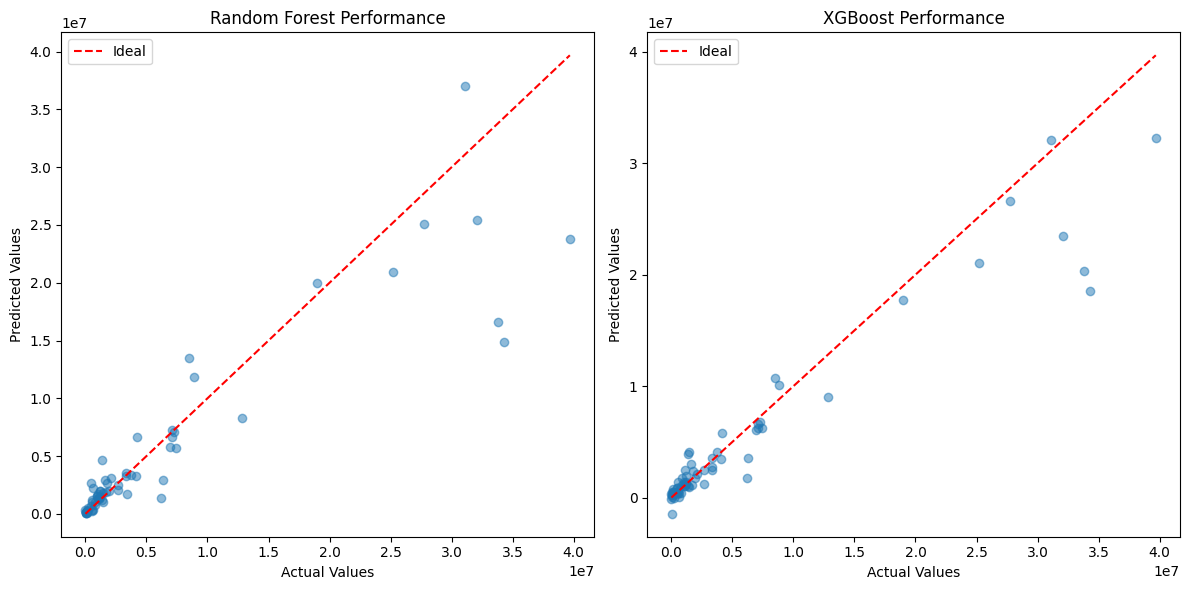

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Random Forest
ax1.scatter(y_test, y_pred1, alpha=0.5)  # Scatter plot of actual vs. predicted
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')  # Ideal line
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Random Forest Performance')
ax1.legend()

# Plot for XGBoost
ax2.scatter(y_test, y_pred2, alpha=0.5)  # Scatter plot of actual vs. predicted
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')  # Ideal line
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('XGBoost Performance')
ax2.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error




# Select features and target variable
X = cleaned_df[['Locations', 'Average_screens', 'ISO Week']]  # Choose relevant features
y = cleaned_df['Opening_Weekend_Gross']

# Create polynomial features
poly = PolynomialFeatures(degree=5)  # Experiment with different degrees
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))



RMSE: 4421120.496450777
R-squared: 0.8243655093899086
MAPE: 4.115782867162454


Bootstrapped Dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.utils import resample

# Assuming bootstrapped_df is already created

def bootstrap_data(df, n_samples):
  """
  Performs bootstrapping to increase the size of a DataFrame.

  Args:
    df: The original DataFrame.
    n_samples: The desired number of samples in the bootstrapped DataFrame.

  Returns:
    A new DataFrame with the bootstrapped samples.
  """
  bootstrapped_df = resample(df, replace=True, n_samples=n_samples, random_state=42)
  return bootstrapped_df

# Call the bootstrap_data function to create bootstrapped_df
# Assuming 'cleaned_df' is your original DataFrame and you want 1000 samples
bootstrapped_df = bootstrap_data(cleaned_df, 50000) # Create bootstrapped_df here


# Prepare the data using bootstrapped_df
X_ori = bootstrapped_df[['Rating', 'ISO Week', 'Origin', 'Locations', 'Primary Genre', 'Average_screens']]
y = bootstrapped_df['Opening_Weekend_Gross']

# One-hot encode categorical features
X_cat = pd.get_dummies(X_ori[['Rating', 'Origin', 'Primary Genre', 'ISO Week']],
                      columns=['Rating', 'Origin', 'Primary Genre', 'ISO Week'],
                      drop_first=True)

# Combine features
X = pd.concat([X_ori[['Locations', 'Average_screens']], X_cat], axis=1)

# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform 'Locations'
X[['Locations_scaled','Average_screens_scaled']] = sc.fit_transform(X[['Locations', 'Average_screens']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions
y_pred1 = rf_model.predict(X_test)

# Calculate metrics
MAPE = mean_absolute_percentage_error(y_test, y_pred1)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred1))
R2 = r2_score(y_test, y_pred1)

print("MAPE:", MAPE)
print("RMSE:", RMSE)
print("R2:", R2)

MAPE: 0.11942715333739493
RMSE: 34445.51242268257
R2: 0.9999936133162028


In [ ]:
bootstrapped_df.describe()

,ISO Week,Opening_Weekend_Gross,Locations,Opng Wknd Avg N,Average_screens
count,50000.00,50000.00,50000.00,50000.00,50000.00
mean,27.97,6944130.65,27.02,504.23,1.92
std,15.81,16346652.91,21.69,983.34,4.13
min,1.00,1500.00,1.00,4.13,0.00
25%,13.00,500000.00,5.00,96.43,0.00
50%,29.00,1901600.00,27.18,199.44,1.00
75%,43.00,6932233.56,46.00,512.70,2.00
max,53.00,223042160.31,87.00,14109.74,46.00
